In [16]:
import pandas as pd
import sys
import numpy as np
import os
sys.path.append(os.path.join(os.path.dirname(os.getcwd()), "src"))
import utils
import ast
import matplotlib.pyplot as plt
import numpy as np

In [17]:
# Get metadata of weights.pt file
# import torch

# # Specify the path to your .pt file
# weights_path = 'Z:\\__AdvancedTechnologyBackup\\06_ModelWeights\\GobyFinderAUV1376-run13-tiles_2.pt'

# try:
#     # Load the raw checkpoint file (it's a Python dictionary)
#     checkpoint = torch.load(weights_path, map_location='cpu')

#     # Access the 'epoch' key directly
#     epoch_number = checkpoint.get('epoch', 'Not Found')
    
#     # Ultralytics often saves a zero-indexed epoch. Add 1 for the completed epoch number.
#     # The saved 'epoch' value is the *index* of the next epoch to start, 
#     # so we print it as is, or adjust if it's the 0-indexed count.
    
#     print("\n--- Epoch Information ---")
#     print(f"The model was saved at the end of epoch: {epoch_number}")
    
#     # The 'last.pt' file often stores the epoch count *before* the next epoch starts, 
#     # but for clarity, the raw value is usually the most direct answer.
    
# except Exception as e:
#     print(f"An error occurred while loading the checkpoint: {e}")

In [18]:
def get_metrics(curve_path):
    df = pd.read_csv(curve_path, index_col=0)
    c = df.iloc[1,0].split()[1:-1]
    c = [float(num) for num in c]
    pr = df.iloc[0,1].split()[1:-1]
    pr = [float(num) for num in pr]
    f1 = df.iloc[1,1].split()[1:-1]
    f1 = [float(num) for num in f1]
    p = df.iloc[2,1].split()[1:-1]
    p = [float(num) for num in p]
    r = df.iloc[3,1].split()[1:-1]
    r = [float(num) for num in r]
    fmax = np.max(f1)
    cmax = c[np.argmax(f1)]
    df = pd.DataFrame(np.c_[c, p, r, f1], columns=["conf", "precision", "recall", "f1"])
    df['diff'] = abs(df['precision'] - df['recall'])
    eq = df.loc[df['diff'].idxmin(), ['conf', "recall"]]
    c_eq = eq.conf
    pr_eq = eq.recall
    print(f'The confidence threshold where "precision" and "recall" are the closest is: {c_eq} @ {pr_eq}')
    print(f'The confidence threshold where "F1" is at its maximum is: {cmax} @ {fmax}')
    return df, fmax, cmax, c_eq, pr_eq

The confidence threshold where "precision" and "recall" are the closest is: 0.29429 @ 0.81001
The confidence threshold where "F1" is at its maximum is: 0.35135 @ 0.81288
The confidence threshold where "precision" and "recall" are the closest is: 0.35836 @ 0.80371
The confidence threshold where "F1" is at its maximum is: 0.37838 @ 0.80546
The confidence threshold where "precision" and "recall" are the closest is: 0.26226 @ 0.79162
The confidence threshold where "F1" is at its maximum is: 0.3013 @ 0.79484
The confidence threshold where "precision" and "recall" are the closest is: 0.14815 @ 0.80358
The confidence threshold where "F1" is at its maximum is: 0.1982 @ 0.80967


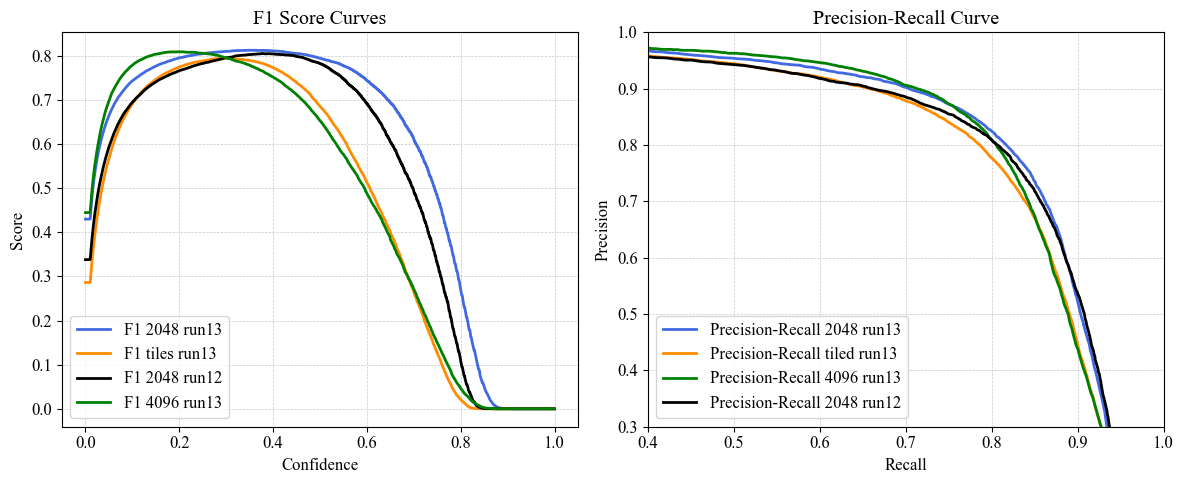

In [19]:
## Run12 - run13 plots
run12 = r"..\output\validation\detect\run12+_png\validation_output_curves.csv"
run_13_2048 = r"..\output\validation\detect\run13-2048\run13_2048_curves.csv"
run_13_4096 = r"..\output\validation\detect\run13-4096\run13_4096_curves.csv"
run13_tiled = r"..\output\validation\detect\run13-tiled\run13-tiled_curves.csv"

df13, fmax13, cmax13, c_eq13, pr_eq13 = get_metrics(run_13_2048)
df12, fmax12, cmax12, c_eq12, pr_eq12 = get_metrics(run12)
dft, fmaxt, cmaxt, c_eqt, pr_eqt = get_metrics(run13_tiled)
dff, fmaxf, cmaxf, c_eqf, pr_eqf = get_metrics(run_13_4096)

# Update rcParams for Times New Roman font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Create a figure and a 1x2 set of subplots
# figsize=(12, 5) provides a good aspect ratio for two plots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 

# --- Left Subplot (ax[0]): F1 Score Curves ---
# Note: plt.plot is replaced with ax[0].plot and other functions like plt.title with ax[0].set_title

# Plot lines
ax[0].plot(df13.conf, df13.f1, label="F1 2048 run13", linestyle='-', marker="", linewidth=2, color='royalblue')
ax[0].plot(dft.conf, dft.f1, label="F1 tiles run13", linestyle='-', linewidth=2, color='darkorange')
ax[0].plot(df12.conf, df12.f1, label="F1 2048 run12", linestyle='-', linewidth=2, color='black')
ax[0].plot(dff.conf, dff.f1, label="F1 4096 run13", linestyle='-', linewidth=2, color='green')

# Set labels and title
ax[0].set_xlabel('Confidence') 
ax[0].set_ylabel('Score')
ax[0].set_title('F1 Score Curves')

# Add legend and grid
ax[0].legend(loc='best', frameon=True)
ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --- Right Subplot (ax[1]): Precision-Recall Curve ---
# Note: plt.plot is replaced with ax[1].plot and other functions like plt.title with ax[1].set_title

# Plot lines
ax[1].plot(df13.recall, df13.precision, label="Precision-Recall 2048 run13", color='royalblue', linewidth=2)
ax[1].plot(dft.recall, dft.precision, label="Precision-Recall tiled run13", color='darkorange', linewidth=2)
ax[1].plot(dff.recall, dff.precision, label="Precision-Recall 4096 run13", color='green', linewidth=2)
ax[1].plot(df12.recall, df12.precision, label="Precision-Recall 2048 run12", color='black', linewidth=2)

# Set labels, limits, and title
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
ax[1].set_xlim(0.4, 1)
ax[1].set_ylim(0.3, 1)
ax[1].set_title('Precision-Recall Curve')

# Add legend and grid
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Save the figure
# plt.savefig('side_by_side_scores.png', dpi=600, bbox_inches = "tight", transparent=True)
# plt.show() # Use this instead of savefig if you want to display interactively

The confidence threshold where "precision" and "recall" are the closest is: 0.28629 @ 0.85122
The confidence threshold where "F1" is at its maximum is: 0.28629 @ 0.85165
The confidence threshold where "precision" and "recall" are the closest is: 0.26927 @ 0.80552
The confidence threshold where "F1" is at its maximum is: 0.33433 @ 0.81322
The confidence threshold where "precision" and "recall" are the closest is: 0.24024 @ 0.70497
The confidence threshold where "F1" is at its maximum is: 0.27227 @ 0.70951
The confidence threshold where "precision" and "recall" are the closest is: 0.25225 @ 0.72281
The confidence threshold where "F1" is at its maximum is: 0.27327 @ 0.72584


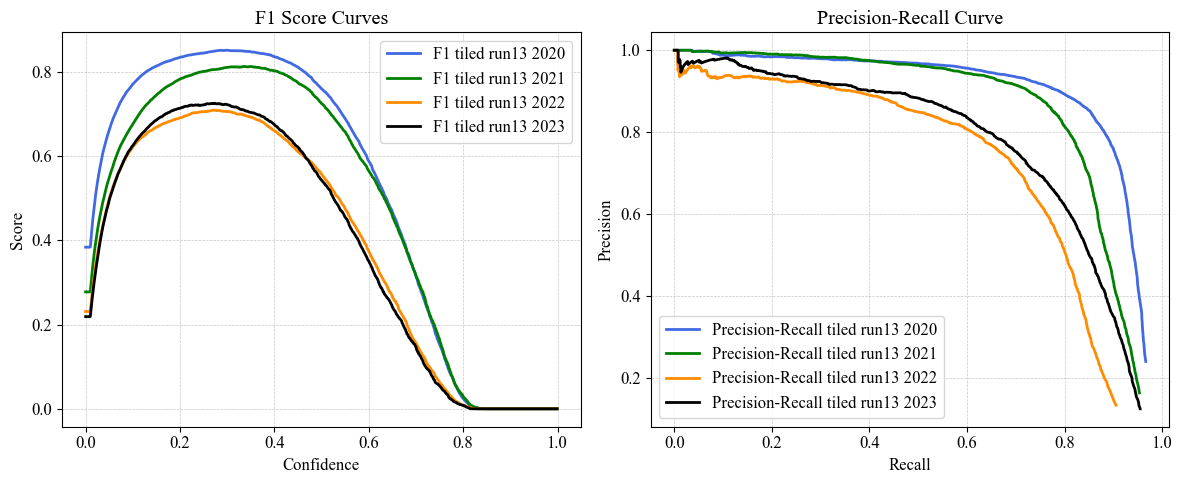

In [21]:
# tiled plots
test_2020 = r"..\output\validation\detect\2020 tile test\2020 tile test_curves.csv"
test_2021 = r"..\output\validation\detect\2021 tile test\2021 tile test_curves.csv"
test_2022 = r"..\output\validation\detect\2022 tile test\2022 tile test_curves.csv"
test_2023 = r"..\output\validation\detect\2023 tile test\2023 tile test_curves.csv"

df20, fmax20, cmax20, c_eq20, pr_eq20 = get_metrics(test_2020)
df21, fmax21, cmax21, c_eq21, pr_eq21 = get_metrics(test_2021)
df22, fmax22, cmax22, c_eq22, pr_eq22 = get_metrics(test_2022)
df23, fmax23, cmax23, c_eq23, pr_eq23 = get_metrics(test_2023)

# Update rcParams for Times New Roman font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Create a figure and a 1x2 set of subplots
# figsize=(12, 5) provides a good aspect ratio for two plots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 

# --- Left Subplot (ax[0]): F1 Score Curves ---
# Note: plt.plot is replaced with ax[0].plot and other functions like plt.title with ax[0].set_title

# Plot lines
ax[0].plot(df20.conf, df20.f1, label="F1 tiled run13 2020", linestyle='-', marker="", linewidth=2, color='royalblue')
ax[0].plot(df21.conf, df21.f1, label="F1 tiled run13 2021", linestyle='-', marker="", linewidth=2, color='green')
ax[0].plot(df22.conf, df22.f1, label="F1 tiled run13 2022", linestyle='-', marker="", linewidth=2, color='darkorange')
ax[0].plot(df23.conf, df23.f1, label="F1 tiled run13 2023", linestyle='-', marker="", linewidth=2, color='black')

# Set labels and title
ax[0].set_xlabel('Confidence') 
ax[0].set_ylabel('Score')
ax[0].set_title('F1 Score Curves')

# Add legend and grid
ax[0].legend(loc='best', frameon=True)
ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --- Right Subplot (ax[1]): Precision-Recall Curve ---
# Note: plt.plot is replaced with ax[1].plot and other functions like plt.title with ax[1].set_title

# Plot lines
ax[1].plot(df20.recall, df20.precision, label="Precision-Recall tiled run13 2020", color='royalblue', linewidth=2)
ax[1].plot(df21.recall, df21.precision, label="Precision-Recall tiled run13 2021", color='green', linewidth=2)
ax[1].plot(df22.recall, df22.precision, label="Precision-Recall tiled run13 2022", color='darkorange', linewidth=2)
ax[1].plot(df23.recall, df23.precision, label="Precision-Recall tiled run13 2023", color='black', linewidth=2)

# Set labels, limits, and title
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
# ax[1].set_xlim(0.4, 1)
# ax[1].set_ylim(0.3, 1)
ax[1].set_title('Precision-Recall Curve')

# Add legend and grid
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Save the figure
# plt.savefig('side_by_side_scores.png', dpi=600, bbox_inches = "tight", transparent=True)
# plt.show() # Use this instead of savefig if you want to display interactively

The confidence threshold where "precision" and "recall" are the closest is: 0.32032 @ 0.86721
The confidence threshold where "F1" is at its maximum is: 0.32332 @ 0.86745
The confidence threshold where "precision" and "recall" are the closest is: 0.24825 @ 0.8154
The confidence threshold where "F1" is at its maximum is: 0.34935 @ 0.82475
The confidence threshold where "precision" and "recall" are the closest is: 0.28629 @ 0.71278
The confidence threshold where "F1" is at its maximum is: 0.40941 @ 0.71967
The confidence threshold where "precision" and "recall" are the closest is: 0.34835 @ 0.75991
The confidence threshold where "F1" is at its maximum is: 0.3023 @ 0.76208


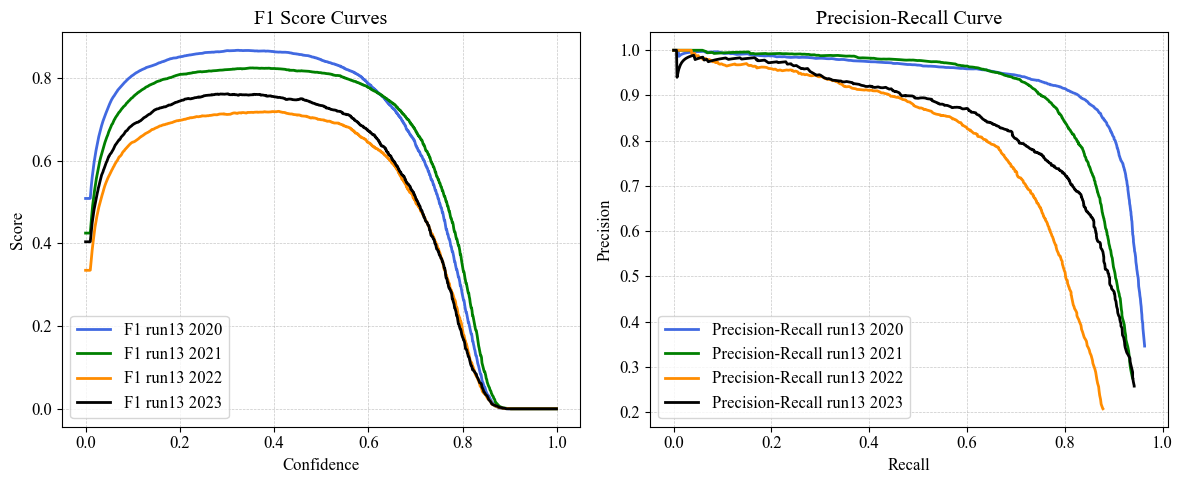

In [22]:
# full image run 13 plots
test_2020 = r"..\output\validation\detect\2020 full test\2020 full test_curves.csv"
test_2021 = r"..\output\validation\detect\2021 full test\2021 full test_curves.csv"
test_2022 = r"..\output\validation\detect\2022 full test\2022 full test_curves.csv"
test_2023 = r"..\output\validation\detect\2023 full test\2023 full test_curves.csv"

df20, fmax20, cmax20, c_eq20, pr_eq20 = get_metrics(test_2020)
df21, fmax21, cmax21, c_eq21, pr_eq21 = get_metrics(test_2021)
df22, fmax22, cmax22, c_eq22, pr_eq22 = get_metrics(test_2022)
df23, fmax23, cmax23, c_eq23, pr_eq23 = get_metrics(test_2023)

# Update rcParams for Times New Roman font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12

# Create a figure and a 1x2 set of subplots
# figsize=(12, 5) provides a good aspect ratio for two plots side-by-side
fig, ax = plt.subplots(1, 2, figsize=(12, 5)) 

# --- Left Subplot (ax[0]): F1 Score Curves ---
# Note: plt.plot is replaced with ax[0].plot and other functions like plt.title with ax[0].set_title

# Plot lines
ax[0].plot(df20.conf, df20.f1, label="F1 run13 2020", linestyle='-', marker="", linewidth=2, color='royalblue')
ax[0].plot(df21.conf, df21.f1, label="F1 run13 2021", linestyle='-', marker="", linewidth=2, color='green')
ax[0].plot(df22.conf, df22.f1, label="F1 run13 2022", linestyle='-', marker="", linewidth=2, color='darkorange')
ax[0].plot(df23.conf, df23.f1, label="F1 run13 2023", linestyle='-', marker="", linewidth=2, color='black')

# Set labels and title
ax[0].set_xlabel('Confidence') 
ax[0].set_ylabel('Score')
ax[0].set_title('F1 Score Curves')

# Add legend and grid
ax[0].legend(loc='best', frameon=True)
ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# --- Right Subplot (ax[1]): Precision-Recall Curve ---
# Note: plt.plot is replaced with ax[1].plot and other functions like plt.title with ax[1].set_title

# Plot lines
ax[1].plot(df20.recall, df20.precision, label="Precision-Recall run13 2020", color='royalblue', linewidth=2)
ax[1].plot(df21.recall, df21.precision, label="Precision-Recall run13 2021", color='green', linewidth=2)
ax[1].plot(df22.recall, df22.precision, label="Precision-Recall run13 2022", color='darkorange', linewidth=2)
ax[1].plot(df23.recall, df23.precision, label="Precision-Recall run13 2023", color='black', linewidth=2)

# Set labels, limits, and title
ax[1].set_xlabel('Recall')
ax[1].set_ylabel('Precision')
# ax[1].set_xlim(0.4, 1)
# ax[1].set_ylim(0.3, 1)
ax[1].set_title('Precision-Recall Curve')

# Add legend and grid
ax[1].legend()
ax[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Save the figure
# plt.savefig('side_by_side_scores.png', dpi=600, bbox_inches = "tight", transparent=True)
# plt.show() # Use this instead of savefig if you want to display interactively

# Balanced Test Analysis

In [ ]:
# bal_test_curves = r"validation\detect\balanced_test_init\balanced_test_init_curves.csv"
year = 2021
bal_test_curves = f"validation\\detect\\balanced_test_init_{year}\\balanced_test_init_{year}_curves.csv"
dfb, f1b_max, cb_max, c_eq, pr_eq= get_metrics(bal_test_curves)

plt.plot(dfb.conf, dfb.f1, label="F1 score")
plt.plot(dfb.conf, dfb.precision, label="precision")
plt.plot(dfb.conf, dfb.recall, label="recall")
cmax, f1max = cb_max, f1b_max
plt.annotate(f'Max F1\n({cmax:.3f}, {f1max:.2f})', xy=(cmax, f1max), xytext=(cmax+0.09, f1max-.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.annotate(f'Precision~Recall\n({c_eq:.3f}, {pr_eq:.2f})', xy=(c_eq, pr_eq), xytext=(c_eq-0.3, pr_eq-0.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.xlabel('confidence') 
plt.ylabel('f1') 
plt.title(f'f1-score, precision, and recall curves {year}')
plt.legend()

plt.show()

# GoPro

In [4]:
# gp1 = r"validation\detect\GoPro_round1_validation\GoPro_round1_validation_curves.csv"
gp1 = r"..\output\validation\detect\GoPro-qaqc1\GoPro-qaqc1_curves.csv"
gp2 = r"..\output\validation\detect\GoPro_round2_validation\GoPro_round2_validation_curves.csv"
df_gp1, f1max_gp1, cmax_gp1, c_eq_gp1, pr_eq_gp1 = get_metrics(gp1)
df_gp2, f1max_gp2, cmax_gp2, c_eq_gp2, pr_eq_gp2 = get_metrics(gp2)

The confidence threshold where "precision" and "recall" are the closest is: 0.18519 @ 0.88988
The confidence threshold where "F1" is at its maximum is: 0.16617 @ 0.89067
The confidence threshold where "precision" and "recall" are the closest is: 0.32232 @ 0.87934
The confidence threshold where "F1" is at its maximum is: 0.38939 @ 0.88069


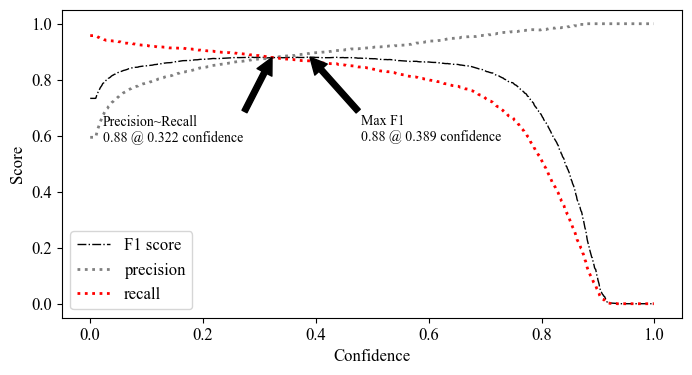

In [ ]:
# Update rcParams for Times New Roman font globally
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 12
plt.figure(figsize=(8, 4))
plt.plot(df_gp2.conf, df_gp2.f1, label="F1 score", linestyle='-.',marker = "", linewidth=1, color='black')
plt.plot(df_gp2.conf, df_gp2.precision, label="precision", linestyle=':', linewidth=2, color='gray')
plt.plot(df_gp2.conf, df_gp2.recall, label="recall", linestyle=':', linewidth=2, color='red')
cmax, f1max = cmax_gp2, f1max_gp2
c_eq = c_eq_gp2
pr_eq = pr_eq_gp2
plt.annotate(f'Max F1\n{f1max:.2f} @ {cmax:.3f} confidence', xy=(cmax, f1max), xytext=(cmax+0.09, f1max-.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.annotate(f'Precision~Recall\n{pr_eq:.2f} @ {c_eq:.3f} confidence', xy=(c_eq, pr_eq), xytext=(c_eq-0.3, pr_eq-0.3), arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='black')
plt.xlabel('Confidence') 
plt.ylabel('Score')
# plt.title(f'F1-score, precision, and recall curves')

plt.legend(loc='best', frameon=True)
# plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig(r"..\output\validation\detect\GoPro_round2_validation\scores.png", dpi=600, bbox_inches = "tight", transparent=True)
plt.show()

In [ ]:
plt.plot(df_gp1.conf, df_gp1.f1, label="F1-round1")
plt.plot(df_gp2.conf, df_gp2.f1, label="F1-round2")
# plt.plot(df_gp1.conf, df_gp1.precision, label="precision-round1")
# plt.plot(df_gp1.conf, df_gp1.recall, label="precision-round1")
# plt.plot(df_gp2.conf, df_gp2.precision, label="precision-round2")
# plt.plot(df_gp2.conf, df_gp2.recall, label="recall-round2")
# GoPro QAQC round 1
plt.annotate(f'Max value\n({cmax_gp1:.2f}, {f1max_gp1:.2f})', xy=(cmax_gp1, f1max_gp1), 
             xytext=(cmax_gp1-0.09, f1max_gp1-.3), 
             arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='cornflowerblue')
# GoPro QAQC round 2
plt.annotate(f'Max value\n({cmax_gp2:.2f}, {f1max_gp2:.2f})', 
             xy=(cmax_gp2, f1max_gp2), xytext=(cmax_gp2-0.09, f1max_gp2-.3), 
             arrowprops=dict(facecolor='black', shrink=0.0005), fontsize=10, color='orange')
plt.xlabel('confidence') 
plt.ylabel('f1') 
plt.title('f1-score Curve GoPro')
plt.legend()

In [ ]:
plt.plot(df_gp1.precision, df_gp1.recall, label="QAQC round 1")
plt.plot(df_gp2.precision, df_gp2.recall, label="QAQC round 2")
plt.xlabel('Recall') 
plt.ylabel('Precision') 
plt.title('GoPro Precision-Recall Curve')
plt.legend()